<a href="https://colab.research.google.com/github/Gulululu-max/-/blob/master/cisc_7026_2024_asg1_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you will implement linear regression. You have a number of tasks:

1. You must construct the design matrix $\mathbf{X}_D$
2. You must construct the ground truth outputs $\mathbf{y}$
3. Using $\mathbf{X}_D$ and $\mathbf{y}$, you must find the parameters $\mathbf{\theta}$ that minimize the error
4. To verify correctness, look at the generated plot and see if your model makes sense

After you are successful with the linear model, focus on the nonlinear model
5. Construct a design matrix $\mathbf{X}_D$ that contains polynomial terms
6. Find the parameters $\mathbf{\theta}$ that minimize this nonlinear model
7. To verify correctness, ensure the plot makes sense
8. Test a different number of terms in $\mathbf{X}_D$, and turn in your assignment with the model that you think looks best
9. Make sure you also test generalization capability using separate training and testing datasets!

In [1]:
# Import libraries and download dataset
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
import csv
import pandas as pd
import matplotlib.pyplot as plt


!wget https://gist.githubusercontent.com/smorad/82ff16382b43ec09f7aefcaf8799d756/raw/4aa3e79a555e64bd6fa38124e6ae8fc89df47d59/Life_Expectancy_Data.csv

csv = pd.read_csv('Life_Expectancy_Data.csv')
csv = csv.sort_values(by=['Schooling'],ignore_index=True)
# Some rows have NaN...
csv = csv.dropna()
xs = jnp.array(csv['Schooling']) # Inputs
print(csv.keys())
ys = jnp.array(csv['Life_expectancy ']) # Outputs

--2024-09-02 13:12:24--  https://gist.githubusercontent.com/smorad/82ff16382b43ec09f7aefcaf8799d756/raw/4aa3e79a555e64bd6fa38124e6ae8fc89df47d59/Life_Expectancy_Data.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306486 (299K) [text/plain]
Saving to: ‘Life_Expectancy_Data.csv’

Life_Expectancy_Dat 100%[===================>] 299.30K  --.-KB/s    in 0.08s   

2024-09-02 13:12:24 (3.62 MB/s) - ‘Life_Expectancy_Data.csv’ saved [306486/306486]

Index(['Country', 'Continent', 'Year', 'Status', 'Life_expectancy ',
       'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
       'Hepatitis_B', 'Measles ', ' BMI ', 'under_five_deaths ', 'Polio',
       'Total_expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinne

In [ ]:
# Set up the model

def f(design, theta):
  """Given the design matrix and parameters, return the prediction"""
  return design @ theta # The @ symbol means matrix-multiply

We have constructed the model, but we need to find the correct parameters! Your job is to use machine learning to find the parameters `W, b`. Write your code in the following cell. The cell after the following cell will plot your prediction. You can tell if your code is correct by looking at the resulting plot. If the line accurately predicts the trend of points, then it is likely to be correct!

---



In [ ]:
# You need to correctly create the design matrix, the label matrix (y)
# Then find the parameters theta

# We can guess some initial parameters (W, b) but we should train them using
# machine learning
W = 1.0
b = 40.0
theta = jnp.array([W, b]).reshape(2, 1)

# Also need to setup the design matrix and y vector
design = jnp.arange(xs.size * 2).reshape(-1, 2) # TODO fix me
y = jnp.ones((*ys.shape, 1)) # TODO fix me
theta = theta # TODO fix me

# To help with debugging
cond = jax.numpy.linalg.cond(design.T @ design)
if cond > 10**10:
  print(f"Warning: your design matrix is ill-conditioned! condition number: {cond}")

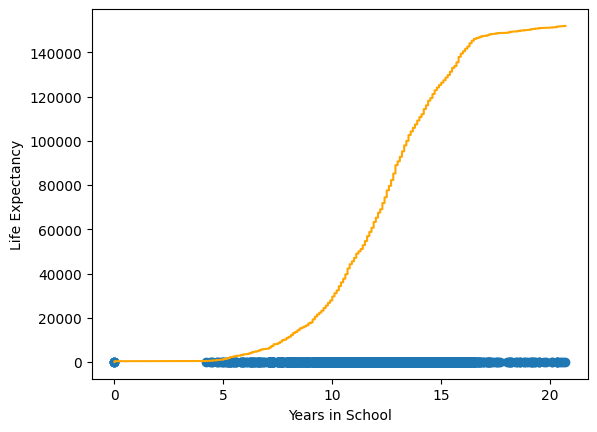

In [ ]:
# Now, let's test it for all the inputs
predictions = f(design, theta)

# Now, let's plot our dataset and our model f
plt.scatter(xs, ys)
plt.xlabel('Years in School')
plt.ylabel('Life Expectancy')

# Predict and plot the model
y_hat = f(design, theta)
plt.plot(xs, predictions, color="orange")

plt.show()

Once you get a good linear fit, let's continue. A linear fit work well enough, but it seems like the dynamics between education and life expectancy might be nonlinear. Next, let's extend our linear function so that it becomes nonlinear.

Right now, our fuction is $Wx + b$. What if we used a polynomial like $W_m x^m + W_{m-1} x^{m-1}, \dots W_1, x^1, b$ for our function instead. In the next code block, regress the dataset using a nonlinear function.

HINT: You should not need to change `f`, the trick is changing the design matrix.

HINT: The choice of $m$ matters, play around with it until you get a good fit (and a well-conditioned matrix)

In [ ]:
# Once you get a good fit, let's continue. A linear function is nice,
# but the data looks like it might not be linear
# Let's try a higher-dimensional polynomial (e.g. W_m x^m, W_(m-1) x^(m-1), ...)
#
# HINT: Think about how you would change the design matrix to handle
# Quadratic, cubic, etc input features
#
# How many powers do you need? Which seems to fit the data best?

design = design # TODO fix me
theta = theta # TODO fix me

# To help with debugging
cond = jax.numpy.linalg.cond(design.T @ design)
if cond > 10**15:
  print(f"Warning: your design matrix is ill-conditioned! condition number: {cond}")



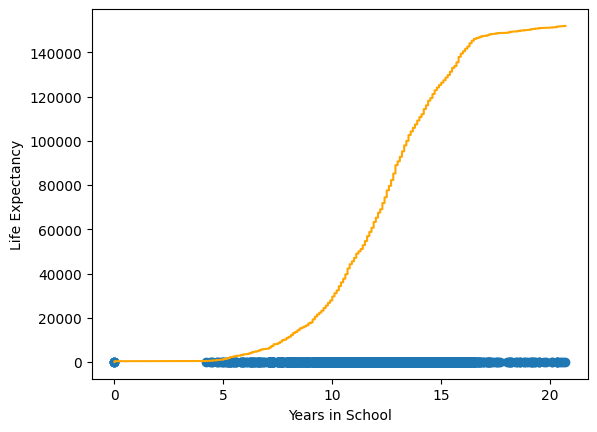

In [ ]:
# Let's run it for all the inputs
predictions = f(design, theta)

# Now, let's plot our dataset and our model f
plt.scatter(xs, ys)
plt.xlabel('Years in School')
plt.ylabel('Life Expectancy')

# Plot the model
plt.plot(xs, predictions, color="orange")

plt.show()

In [ ]:
# Finally, let us repeat the process but using separate train and test sets
# TODO: Construct separate train and test datasets
# Train the model on the train dataset, and evaluate the model on the test dataset
# Plot the results like above, with the train datapoints and the test datapoints as different colors
# Which n provides the best test performance?